In [1]:
### import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan.csv")                                    ### loading dataset into pandas

In [3]:
### dataset analyzing
for i in range(1,2,1):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head())
    print("DESCRIBE:")            
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(614, 13)
COLUMNS:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
HEAD:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583       

In [4]:
df.isnull().sum()                                                    ### to find null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#which features has null values:- 1. Gender ,2. Married  ,3. Dependents ,4. Self_Employed ,5. LoanAmount ,6. Loan_Amount_Term , 7. Credit_History 

In [6]:
## Handling the null value columns 
for col in ["Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]:
     df[col] = df[col].fillna(df[col].mode()[0])                                                     

df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [7]:
#categorical columns(letters):- Gender, Married, Education, Self_Employed, Property_Area, Loan_Status

In [8]:
### convert categorical columns to numerical values     

df.replace({'Gender':{'Male':1,'Female':0},
            'Married':{'No':0,'Yes':1},
            'Education':{'Graduate':1,'Not Graduate':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            "Loan_Status":{'N':0,'Y':1}},inplace=True)                        

df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0


In [9]:
df = df.replace(to_replace='3+', value=4) 

<AxesSubplot:>

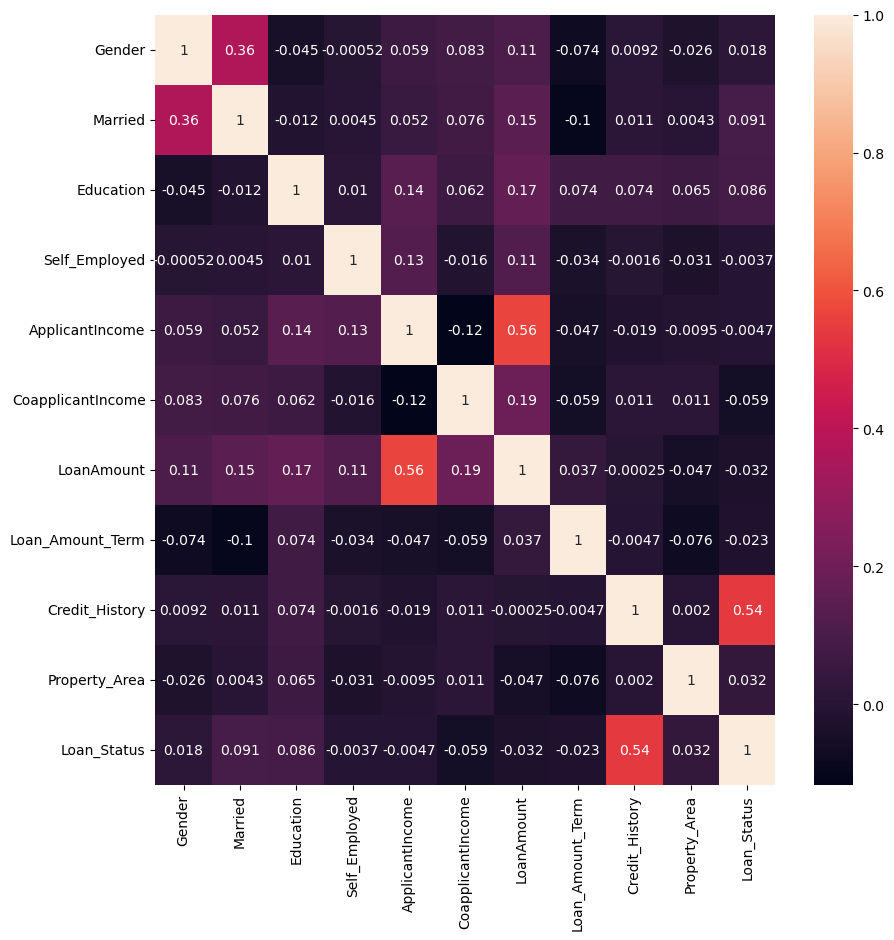

In [10]:
### Data Visualization
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
###splitting features for better analysis
#countplot = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Credit_History"]  
#histplot = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

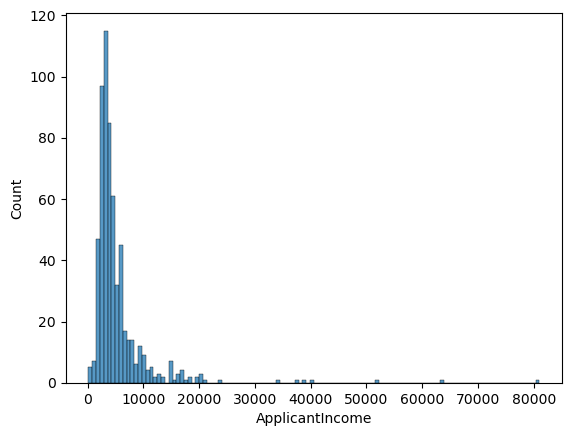

In [12]:
#histplot
sns.histplot(x="ApplicantIncome" ,data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

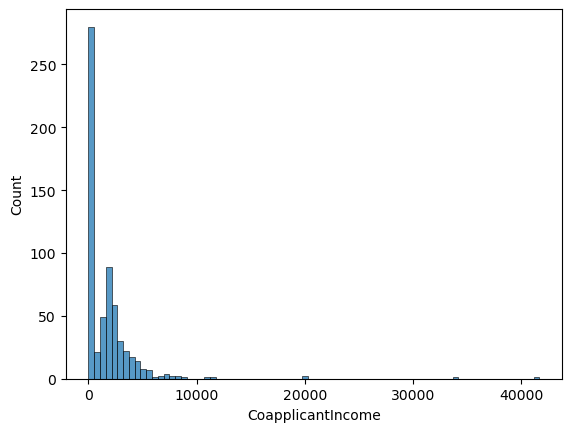

In [13]:
sns.histplot(x="CoapplicantIncome" ,data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

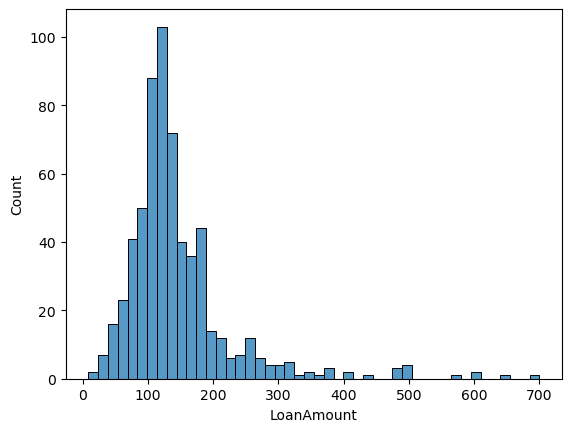

In [14]:
sns.histplot(x="LoanAmount" ,data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

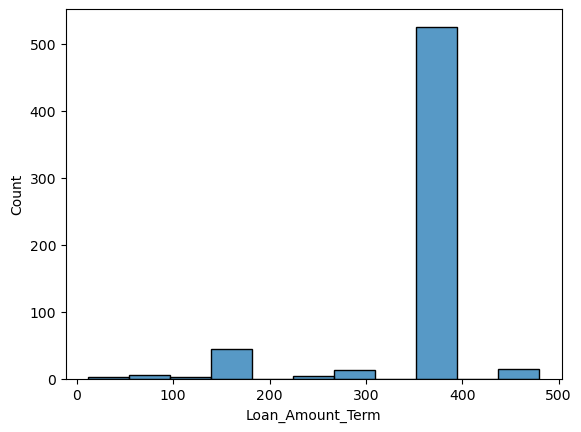

In [15]:
sns.histplot(x="Loan_Amount_Term" ,data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

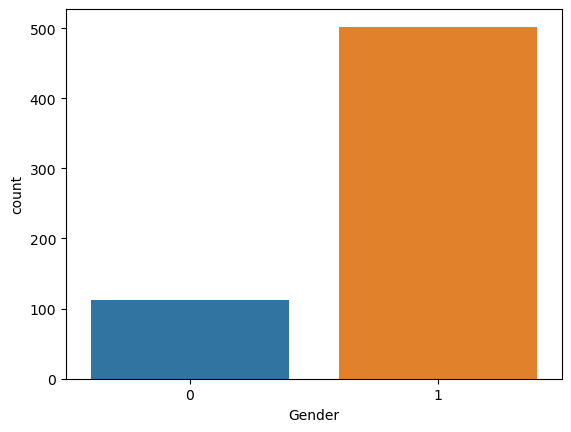

In [16]:
#countplot
sns.countplot(x="Gender",data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

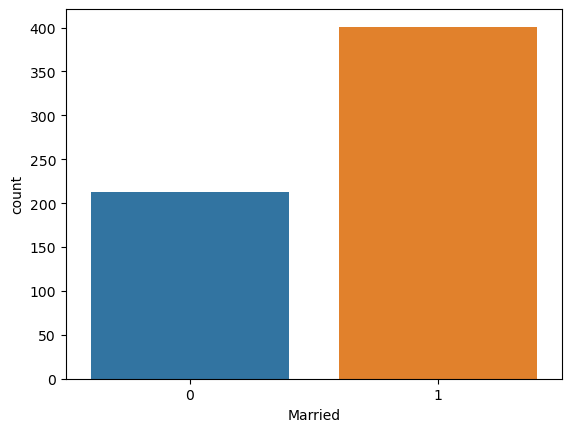

In [17]:
sns.countplot(x="Married",data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

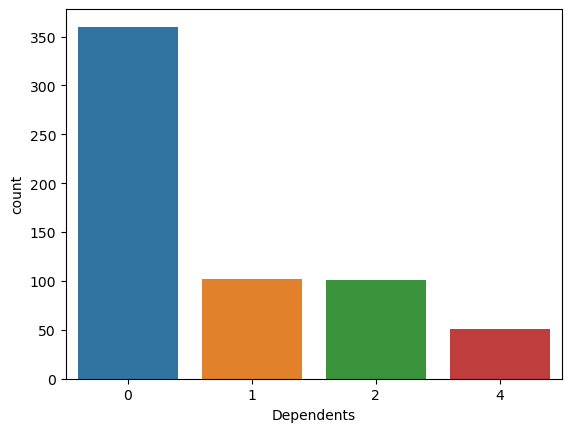

In [18]:
sns.countplot(x="Dependents",data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

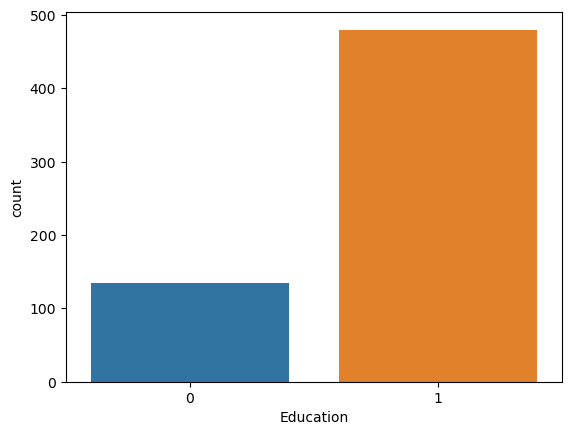

In [19]:
sns.countplot(x="Education",data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

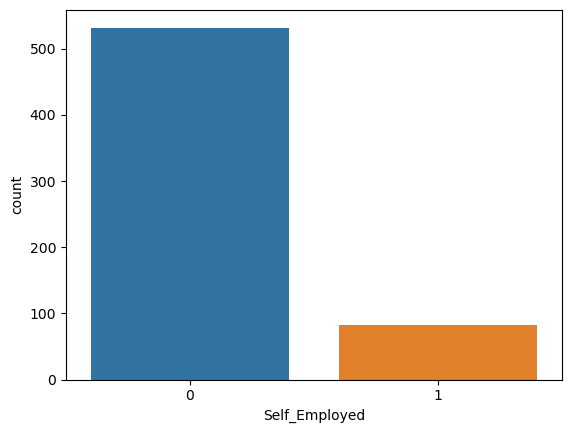

In [20]:
sns.countplot(x="Self_Employed",data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

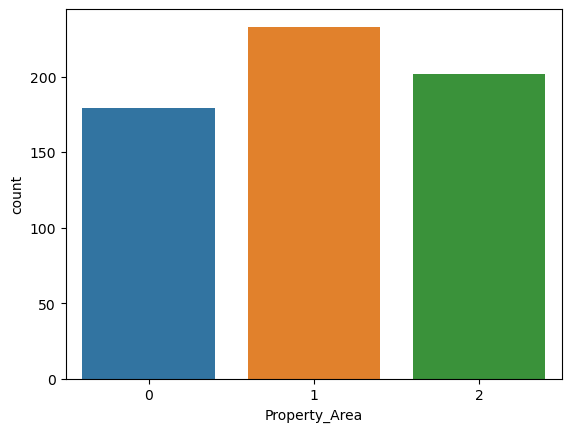

In [21]:
sns.countplot(x="Property_Area",data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

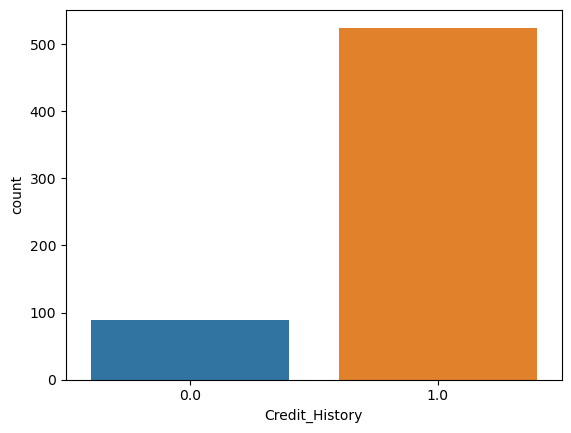

In [22]:
sns.countplot(x="Credit_History" ,data=df)

In [23]:
### feature(x) & label(y)
Y = df['Loan_Status']
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)              

In [24]:
from sklearn.model_selection import train_test_split          ###  traintestsplit
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [25]:
### score & algorithm
#score
from sklearn.metrics import accuracy_score
### CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression          #1
from sklearn.svm import SVC                                  #2
from sklearn.tree import DecisionTreeClassifier              #3
from sklearn.naive_bayes import GaussianNB                   #4
from sklearn.ensemble import RandomForestClassifier          #5
from sklearn.neighbors import KNeighborsClassifier           #6

In [26]:
#1 Logistic Regression
LRM = LogisticRegression()                                                     
LRM.fit(X_train, Y_train)
LRM_PRED = LRM.predict(X_test)

LR_accu = accuracy_score(LRM_PRED, Y_test) 
print("Logistic Accuracy Score: ","{:.2f}%".format(100*LR_accu))  

Logistic Accuracy Score:  81.30%


In [27]:
#2 Support Vector Machine
SVM = SVC()                                                             
SVM.fit(X_train, Y_train)
SVM_PRED = SVM.predict(X_test)

SVM_accu = accuracy_score(SVM_PRED, Y_test)
print("Support Vector Machine Accuracy Score: ","{:.2f}%".format(100*SVM_accu)) 

Support Vector Machine Accuracy Score:  69.11%


In [28]:
#3 Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2)               
DTCM.fit(X_train, Y_train)
DTCM_pred = DTCM.predict(X_test)

DTCM_accu = accuracy_score(DTCM_pred, Y_test)
print("Decison Tree Classifier Accuracy Score: ","{:.2f}%".format(100*DTCM_accu))

Decison Tree Classifier Accuracy Score:  80.49%


In [29]:
#4 Naive Bayes
NBM = GaussianNB()                                                         
NBM.fit(X_train, Y_train)
NBM_pred = NBM.predict(X_test)

NBM_accu = accuracy_score(NBM_pred, Y_test)
print("Naive Bayes Accuracy Score: ","{:.2f}%".format(100*NBM_accu))

Naive Bayes Accuracy Score:  80.49%


In [30]:
#5 Random Forest Classifier
RFM = RandomForestClassifier()                                          
RFM.fit(X_train, Y_train,)
RFM_pred = RFM.predict(X_test)

RFM_accu = accuracy_score(RFM_pred, Y_test)
print("Random Forest Classifier Accuracy Score: ","{:.2f}%".format(100*RFM_accu))

Random Forest Classifier Accuracy Score:  81.30%


In [31]:
#1. Logistic Accuracy Score:  81.30%
#2. Support Vector Machine Accuracy Score:  69.11%
#3. Decison Tree Classifier Accuracy Score:  80.49%
#4. Naive Bayes Accuracy Score:  80.49%
#5. Random Forest Classifier Accuracy Score:  81.30%

In [32]:
#Predictive System 
X = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

Y = np.asarray(X)                                         # NUMPY ARRAY

Z = Y.reshape(1,-1)                                       # RESHAPE

prediction = RFM.predict(Z)
print(prediction)            

[0]


In [33]:
if (prediction[0]==1):
    print('loan approved')
else:
    print('loan not approved')

loan not approved


In [34]:
#Predictive System 
A = (1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2)

B = np.asarray(A)                                         # NUMPY ARRAY

C = B.reshape(1,-1)                                       # RESHAPE

prediction = RFM.predict(C)
print(prediction)            

[1]


In [35]:
if (prediction[0]==1):
    print('loan approved')
else:
    print('loan not approved')

loan approved
